In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
#import network and feature list
import sys
sys.path.append('../python/')
from networkBuilder import *

/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

## Global parameters

In [3]:
# Transparency of Histograms
transp = 0.5

In [4]:
# Set default options for paper
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'figure.facecolor':'white'}
plt.rcParams.update(params)
plt.style.context('default')

In [5]:
feature_names={'jetPt':r'$p_{T,jet}$',
               'jetEta':r'$\eta(jet)$',
               'jetPhi':r'$\phi(jet)$',
               'jetMass':r'$m_{jet}$',
               'jetMassSD':r'$m_{jet,sd}$',
               'tau1_b05':r'$\tau_{1}^{(0.5)}$',
               'tau2_b05':r'$\tau_{2}^{(0.5)}$',
               'tau3_b05':r'$\tau_{3}^{(0.5)}$',
               'tau1_sd_b05':r'$\tau_{1,sd}^{(0.5)}$',
               'tau2_sd_b05':r'$\tau_{2,sd}^{(0.5)}$',
               'tau3_sd_b05':r'$\tau_{3,sd}^{(0.5)}$',
               'tau1_b10':r'$\tau_{1}^{(1)}$',
               'tau2_b10':r'$\tau_{2}^{(1)}$',
               'tau3_b10':r'$\tau_{3}^{(1)}$',
               'tau1_sd_b10':r'$\tau_{1,sd}^{(1)}$',
               'tau2_sd_b10':r'$\tau_{2,sd}^{(1)}$',
               'tau3_sd_b10':r'$\tau_{3,sd}^{(1)}$',
               'tau1_b15':r'$\tau_{1}^{(1.5)}$',
               'tau2_b15':r'$\tau_{2}^{(1.5)}$',
               'tau3_b15':r'$\tau_{3}^{(1.5)}$',
               'tau1_sd_b15':r'$\tau_{1,sd}^{(1.5)}$',
               'tau2_sd_b15':r'$\tau_{2,sd}^{(1.5)}$',
               'tau3_sd_b15':r'$\tau_{3,sd}^{(1.5)}$',
               'tau1_b20':r'$\tau_{1}^{(2)}$',
               'tau2_b20':r'$\tau_{2}^{(2)}$',
               'tau3_b20':r'$\tau_{3}^{(2)}$',
               'tau1_sd_b20':r'$\tau_{1,sd}^{(2)}$',
               'tau2_sd_b20':r'$\tau_{2,sd}^{(2)}$',
               'tau3_sd_b20':r'$\tau_{3,sd}^{(2)}$',
               'chMult':r'$N_{ch}$',
               'neutMult':r'$N_{neut}$',
               'phoMult':r'$N_{\gamma}$',
               'eleMult':r'$N_{e}$',
               'muMult':r'$N_{\mu}$',
               'jetpull':r'$\phi_{pull}$',
               'beta3':r'$\beta_{3}$',
               'beta3_sd':r'$\beta_{3}^{g}$',
               'tau21':r'$\tau_{2}^{(1)} / \tau_{1}^{(1)}$',
               'deltaR_subjets':r'$\Delta_r$',
               'z':r'$z$',
               'dxy_max':r'$d_{xy,max}$',
               'dz_max':r'$d_{z,max}$',
               'jetpull_abs':r'$|\phi_{pull}|$'
              }

## Define Functions

In [6]:
def Draw_HistoGram(data_sig, data_bkg, feat, bins, minx, maxx, legend_loc = 'best', b_ylog = False):
    tick_width = (maxx - minx) / 5
    fig, axs = plt.subplots(1, 1, tight_layout=True, figsize=(7.5,7.5))
    axs.hist(data_sig[feat],
                bins = bins,
                histtype = 'step',
                weights = np.ones(len(data_sig[feat]))/len(data_sig[feat]),
                fill = True,
                alpha = 0.55,
                label = 'Signal',
                log = False,
#                density = True,
                range = [minx, maxx],
                hatch = '/',
                edgecolor='k'
                );    
    axs.hist(data_bkg[feat],
                bins = bins,
                histtype = 'step',
                weights = np.ones(len(data_bkg[feat]))/len(data_bkg[feat]),
                fill = True,
                alpha = 0.55,
                label = 'Background',
                log = False,
#                density = True,
                range = [minx, maxx],
                hatch = '\\',
                edgecolor='k'
                );
    axs.legend(loc = legend_loc);
#    axs.grid()
    axs.set_xlim(minx, maxx)
    axs.xaxis.set_ticks(np.arange(minx, maxx + tick_width, tick_width))
    axs.set_xlabel('Normalized ' + feature_names[feat])
    if b_ylog: axs.set_yscale("log")
    axs.set_ylabel('Fraction')
    plt.savefig('plots/histogram/' + feat + '.png')

## Import data:
Using ShowJetsData_full.npz to build the CNN.

In [7]:
data_sig_images = np.load('/mnt/data/ml/PreProcessing/ShowJets_train_Zbb_exts_msd50to150_images_v2.npz')
data_bkg_images = np.load('/mnt/data/ml/PreProcessing/ShowJets_train_QCD_exts_msd50to150_images_v2.npz')

In [8]:
data_sig = np.load('/mnt/data/ml/PreProcessing/ShowJets_train_Zbb_exts_msd50to150_v2.npz')
data_bkg = np.load('/mnt/data/ml/PreProcessing/ShowJets_train_QCD_exts_msd50to150_v2.npz')

In [10]:
grid = data_sig_images['jetImages'][0].shape[0]

In [11]:
feat_all = get_feat()

## Plot Data

### JetImages

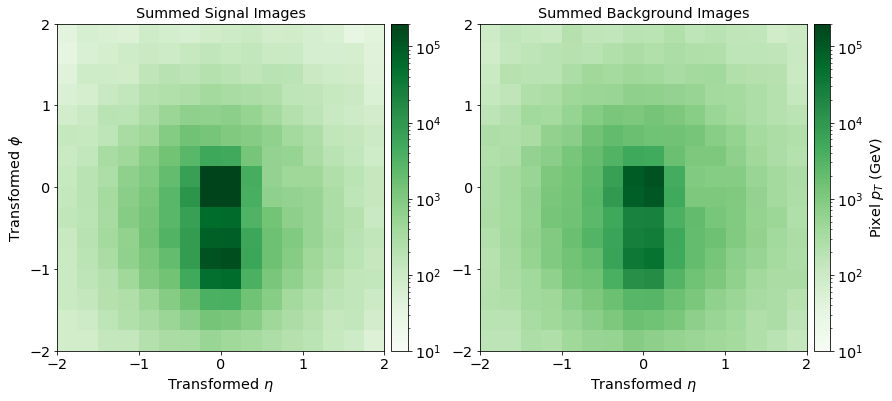

In [13]:
sig_train_images = np.sum(data_sig_images['jetImages'],axis=0).reshape(grid,grid)
bkg_train_images = np.sum(data_bkg_images['jetImages'],axis=0).reshape(grid,grid)

extent_sig = [-sig_train_images.shape[1]/2., sig_train_images.shape[1]/2., -sig_train_images.shape[0]/2., sig_train_images.shape[0]/2. ]
extent_bkg = [-bkg_train_images.shape[1]/2., bkg_train_images.shape[1]/2., -bkg_train_images.shape[0]/2., bkg_train_images.shape[0]/2. ]

# Build figure with train and test set 
fig = plt.figure(figsize = (12.5,8))
ax1 = fig.add_subplot(121)
im0 = ax1.imshow(sig_train_images,
                      interpolation='nearest',
#                      origin='low',
                      cmap = 'Greens',
                      norm=LogNorm(),
                     vmin = 10,
                     vmax = 200000,
                      extent = [-2, 2, -2, 2])
ax1.set_title('Summed Signal Images')
ax1.set_xlabel(r'Transformed $\eta$')
ax1.set_ylabel(r'Transformed $\phi$')
cbar_sig = fig.colorbar(im0,
             fraction=0.0467, pad=0.02,
             ax=ax1)
plt.xticks([-2,-1,0,1,2])
plt.yticks([-2,-1,0,1,2])

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(bkg_train_images,
                      interpolation='nearest',
#                      origin='low',
                      cmap = 'Greens',
                      norm=LogNorm(),
                     vmin = 10,
                     vmax = 200000,
                      extent = [-2, 2, -2, 2])
ax2.set_title('Summed Background Images')
ax2.set_xlabel(r'Transformed $\eta$')
cbar_bkg = fig.colorbar(im2,
             fraction=0.0467, pad=0.02,
             ax=ax2)
cbar_bkg.set_label(r'Pixel $p_T$ (GeV)')
plt.xticks([-2,-1,0,1,2])
plt.yticks([-2,-1,0,1,2])
plt.tight_layout()
plt.savefig('plots/histogram/jet_images.png')

In [ ]:
extent_sig

In [ ]:
sig_train_images.shape

### jetPt

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'jetPt', 50, 0, 1)

### jetEta

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'jetEta', 50, 0, 1)

### jetPhi

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'jetPhi',50, 0, 1, legend_loc = 'lower right')

### jetMass

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'jetMass',50, 0, 1)

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'jetMassSD',50, 0, 1)

### tau1

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'tau1_b05',50, 0, 1)

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'tau1_b10',50, 0, 1)

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'tau1_b15',50, 0, 1)

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'tau1_b20',50, 0, 1)

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'tau1_sd_b05',50, 0, 1)

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'tau1_sd_b10',50, 0, 1)

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'tau1_sd_b15',50, 0, 1)

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'tau1_sd_b20',50, 0, 1)

### tau2

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'tau2_b05',50, 0, 1)

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'tau2_b10',50, 0, 1)

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'tau2_b15',50, 0, 1, legend_loc='upper center')

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'tau2_b20',50, 0, 1)

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'tau2_sd_b05',50, 0, 1)

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'tau2_sd_b10',50, 0, 1)

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'tau2_sd_b15',50, 0, 1)

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'tau2_sd_b20',50, 0, 1)

### tau3

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'tau3_b05',50, 0, 1)

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'tau3_b10',50, 0, 1, legend_loc='upper center')

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'tau3_b15',50, 0, 1, legend_loc='upper center')

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'tau3_b20',50, 0, 1)

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'tau3_sd_b05',50, 0, 1)

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'tau3_sd_b10',50, 0, 1)

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'tau3_sd_b15',50, 0, 1, legend_loc='upper center')

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'tau3_sd_b20',50, 0, 1)

## beta_3

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'beta3',50, 0, 1)

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'beta3_sd',50, 0, 1)

## tau21

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'tau21',50, 0, 1)

### charge Multiplicity

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'chMult',10, 0, 1)

### neutral Multiplicity

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'neutMult',7, 0, 1)

### photon Multiplicity

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'phoMult',12, 0, 1)

### electron Multiplicity

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'eleMult',3, 0, 1)

### muon Mult

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'muMult',2, 0, 1)

### jetpull

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'jetpull_abs',50, 0, 1)

### deltaR

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'deltaR_subjets',50, 0, 1)

### z

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'z',50, 0, 1, legend_loc='upper left')

### dxy max

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'dxy_max',50, 0, 1, legend_loc='upper left', b_ylog = True)

### dz max

In [ ]:
Draw_HistoGram(data_sig, data_bkg, 'dz_max',50, 0, 1, legend_loc='upper left', b_ylog = True)